# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, attention to detail, coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files & a rink template for scatter plots. One data file has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xG) to be merged onto shot attempts for this game. **If an xG value does not correspond to a shot event, it should not be counted**

- X and Y Coordinates are in feet and are adjusted such that both teams attack from left (dz) to right (oz)
    - X values range from -100 (end boards behind the DZ net) to 0 (centre ice) and 100 (end boards behind the OZ net)
    - Y values range from -42.5 (west side boards) to 0 (centre ice) and 42.5 (east side boards)
    - **When creating scatter plots, please use these coordinates along with the provided rink_template to display the full rink**

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

- Compiledgametime is in seconds, periods are 20 minutes long, except for overtime which is 5 minutes or less

Please show all work, **keep written answers succinct and to the point** and most of all, thanks for your time and good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv(r'/content/DA_Tutorial_24.csv')
df2=pd.read_csv(r'/content/DA_Tutorial_24_xg.csv')

## Q1)
### a) Which teamid won the game, what was the score, which period was the winning goal scored in?
### b) Limited to the period where the winning goal was scored, create a scatter plot for the winning team's shot attempts in that period and highlight the winning goal in a different colour.

In [13]:
df1.loc[df1['teamid'] == 311, 'goal'].sum()


3

In [14]:
df1.loc[df1['teamid'] == 315, 'goal'].sum()


4

In [18]:
last_time = df1.loc[(df1['teamid'] == 315) & (df1['goal'] == 1), 'compiledgametime'].max()

if last_time < 1200:
    print("period 1", last_time / 60)
elif last_time < 2400:
    print("period 2", last_time / 60)
else:
    print("period 3", last_time / 60)


period 3 63.97944333333333


<ipython-input-37-4f68e0887368>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_data['distance_from_goal'] = np.sqrt((shots_data['xadjcoord'] - 100)**2 + (shots_data['yadjcoord'] - 0)**2)


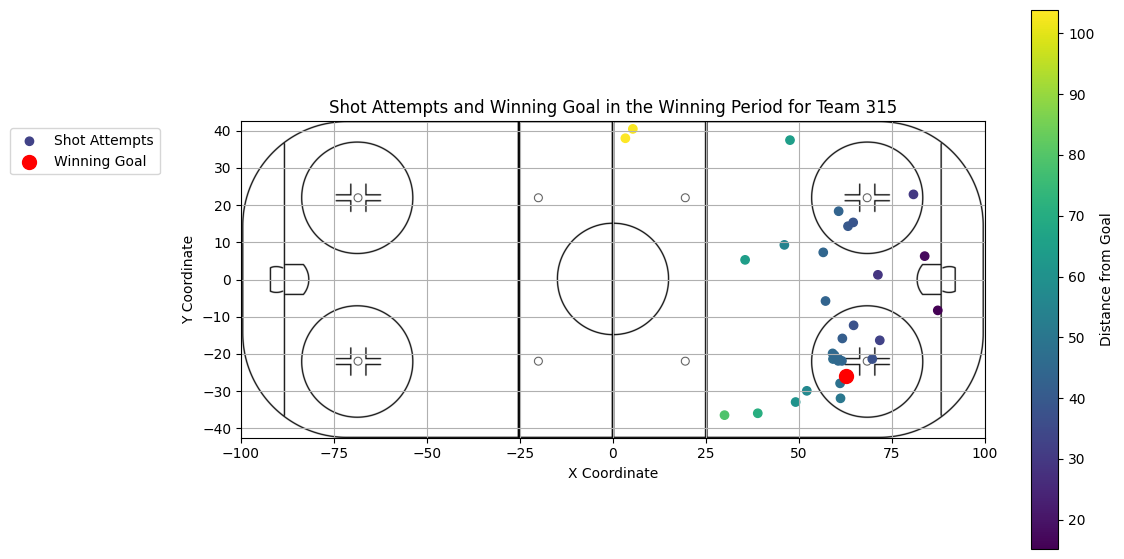

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

shots_data = df1[(df1['teamid'] == 315) & (df1['compiledgametime'] > 2400) & (df1['eventname'].isin(['shot', 'goal']))]

# Find the compiledgametime of the winning goal
winning_goal_time = df1.loc[(df1['teamid'] == 315) & (df1['compiledgametime'] > 2400) & (df1['goal'] == 1), 'compiledgametime'].max()

# Extract the coordinates of the winning goal
winning_goal_coords = shots_data.loc[shots_data['compiledgametime'] == winning_goal_time, ['xadjcoord', 'yadjcoord']]

# Calculate distances from the goal (located at x = 100, y = 0) for each shot
shots_data['distance_from_goal'] = np.sqrt((shots_data['xadjcoord'] - 100)**2 + (shots_data['yadjcoord'] - 0)**2)

# Load your image
img = plt.imread('/content/rink_template.png')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(img, extent=[-100, 100, -42.5, 42.5])

scatter = ax.scatter(shots_data['xadjcoord'], shots_data['yadjcoord'], c=shots_data['distance_from_goal'], cmap='viridis', label='Shot Attempts')
# Highlight the winning goal
ax.scatter(winning_goal_coords['xadjcoord'], winning_goal_coords['yadjcoord'], color='red', label='Winning Goal', s=100)  # s is size of the marker

# Additional plot settings
colorbar = fig.colorbar(scatter, ax=ax, label='Distance from Goal')
ax.set_title('Shot Attempts and Winning Goal in the Winning Period for Team 315')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.legend(bbox_to_anchor=(-0.1, 1))
ax.grid(True)

plt.show()


## A1)
### a) team 311, 3 vs team 315 4. they score in last minuate of third period
### b)

## Q2)

### a) Which playerid scored the winning goal?
### b) Create a scatter plot for all of this player's powerplay shot attempts for the full game.
### c) If we told you these were Alex Ovechkin's powerplay shot attempts, what would you need to do to the Y coordinates for these attempts to appear from "Ovi's Office"? Please re-create the scatter plot accordingly.

In [41]:
last_scorer = df1.loc[(df1['teamid'] == 315) & (df1['goal'] == 1), 'playerid'].max()
last_scorer

81408

To adjust the shot attempts to better represent "Ovi's Office", which is typically located at the left faceoff circle on the ice, we can modify the yadjcoord values by adding 15 to each shot's Y-coordinate. This shift will help to move the shots more to the left, aligning them with the typical position known as "Ovi's Office."



<ipython-input-51-9e07c1bf459b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  powerplay_shots['distance_from_goal'] = np.sqrt((powerplay_shots['xadjcoord'] - 100)**2 + powerplay_shots['yadjcoord']**2)
<ipython-input-51-9e07c1bf459b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  powerplay_shots['yadjcoord'] += 15  # Adjust this value based on the actual location of "Ovi's Office"


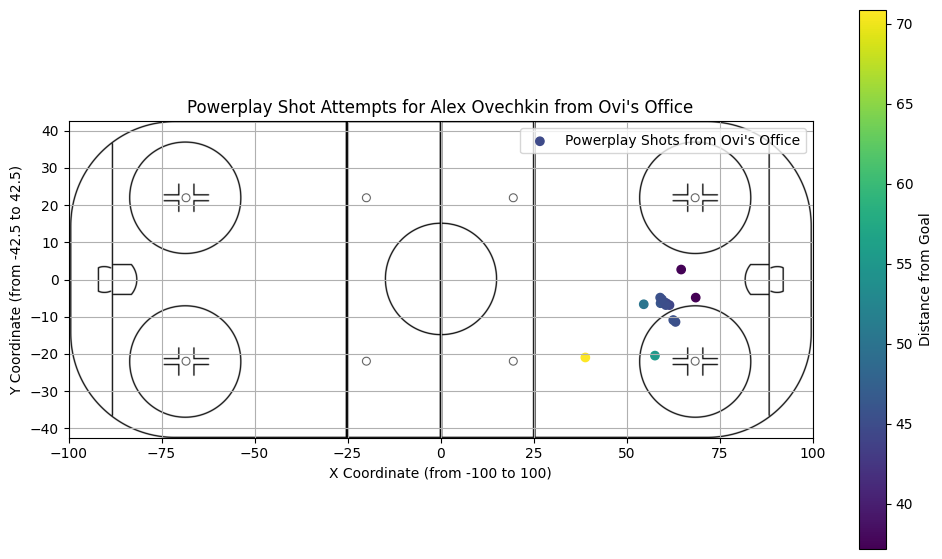

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for powerplay shot attempts by Alex Ovechkin
powerplay_shots = df1[(df1['manpowersituation'] == 'powerPlay') & (df1['eventname'] == 'shot') & (df1['playerid'] == 81408)]

# Calculate distances from the goal (located at x = 100, y = 0) for each shot
powerplay_shots['distance_from_goal'] = np.sqrt((powerplay_shots['xadjcoord'] - 100)**2 + powerplay_shots['yadjcoord']**2)

# Adjusting Y coordinates to reflect "Ovi's Office" at Y=+15
powerplay_shots['yadjcoord'] += 15  # Adjust this value based on the actual location of "Ovi's Office"

# Load an image of a hockey rink if you have one
img = plt.imread('/content/rink_template.png')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(img, extent=[-100, 100, -42.5, 42.5])  # Adjust the extent if necessary to match your data coordinates

# Scatter plot of powerplay shot attempts from "Ovi's Office"
scatter = ax.scatter(powerplay_shots['xadjcoord'], powerplay_shots['yadjcoord'], c=powerplay_shots['distance_from_goal'], cmap='viridis', label='Powerplay Shots from Ovi\'s Office')

# Plotting details
colorbar = fig.colorbar(scatter, ax=ax, label='Distance from Goal')
ax.set_title('Powerplay Shot Attempts for Alex Ovechkin from Ovi\'s Office')
ax.set_xlabel('X Coordinate (from -100 to 100)')
ax.set_ylabel('Y Coordinate (from -42.5 to 42.5)')
ax.legend()
ax.grid(True)

plt.show()


<ipython-input-47-88e6dbe30294>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  powerplay_shots['distance_from_goal'] = np.sqrt((powerplay_shots['xadjcoord'] - 100)**2 + powerplay_shots['yadjcoord']**2)


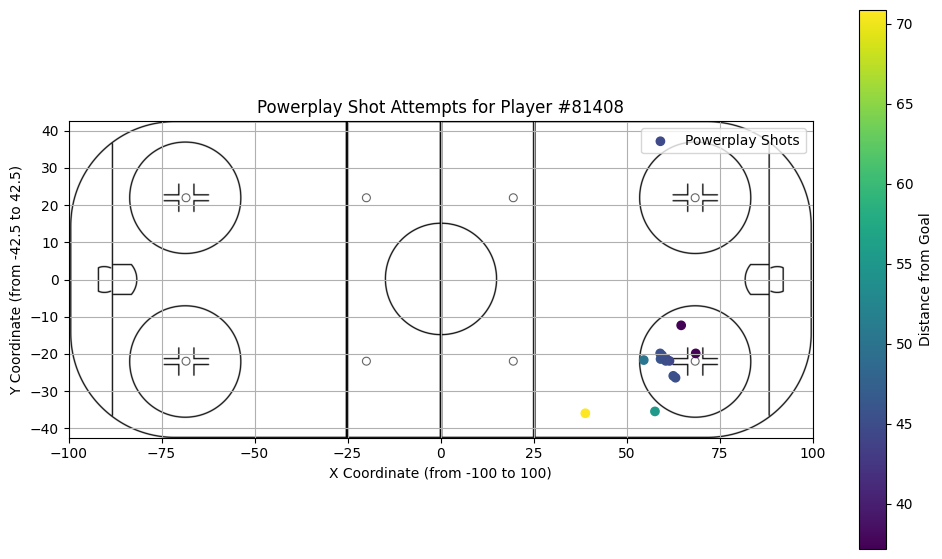

In [47]:
# Filter for powerplay shot attempts by player 81408
powerplay_shots = df1[(df1['manpowersituation'] == 'powerPlay') & (df1['eventname'] == 'shot') & (df1['playerid'] == 81408)]

# Calculate distances from the goal (located at x = 100, y = 0) for each shot
powerplay_shots['distance_from_goal'] = np.sqrt((powerplay_shots['xadjcoord'] - 100)**2 + powerplay_shots['yadjcoord']**2)

# Load an image of a hockey rink if you have one
img = plt.imread('/content/rink_template.png')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(img, extent=[-100, 100, -42.5, 42.5])  # Adjust the extent if necessary to match your data coordinates

# Scatter plot of powerplay shot attempts
scatter = ax.scatter(powerplay_shots['xadjcoord'], powerplay_shots['yadjcoord'], c=powerplay_shots['distance_from_goal'], cmap='viridis', label='Powerplay Shots')

# Plotting details
colorbar = fig.colorbar(scatter, ax=ax, label='Distance from Goal')
ax.set_title('Powerplay Shot Attempts for Player #81408')
ax.set_xlabel('X Coordinate (from -100 to 100)')
ax.set_ylabel('Y Coordinate (from -42.5 to 42.5)')
ax.legend()
ax.grid(True)

plt.show()


## A2)
### a)
### b)
### c)

## Q3)
### a) The Assistant Coach wants to know how each team's even strength pass completion rate breaks down in each zone (please use the zone of pass origin). Build a simple visual to display this information for them in a clear and digestible way.
### b) Which zone was more difficult to complete passes in at even strength, why do you think that is?
### c) What was each goalie id's slot save percentage? (the slot includes innerSlot, westOuterSlot, & eastOuterSlot)

<ipython-input-58-86ad93d5d76e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_df['pass_success'] = passes_df['outcome'] == 'successful'


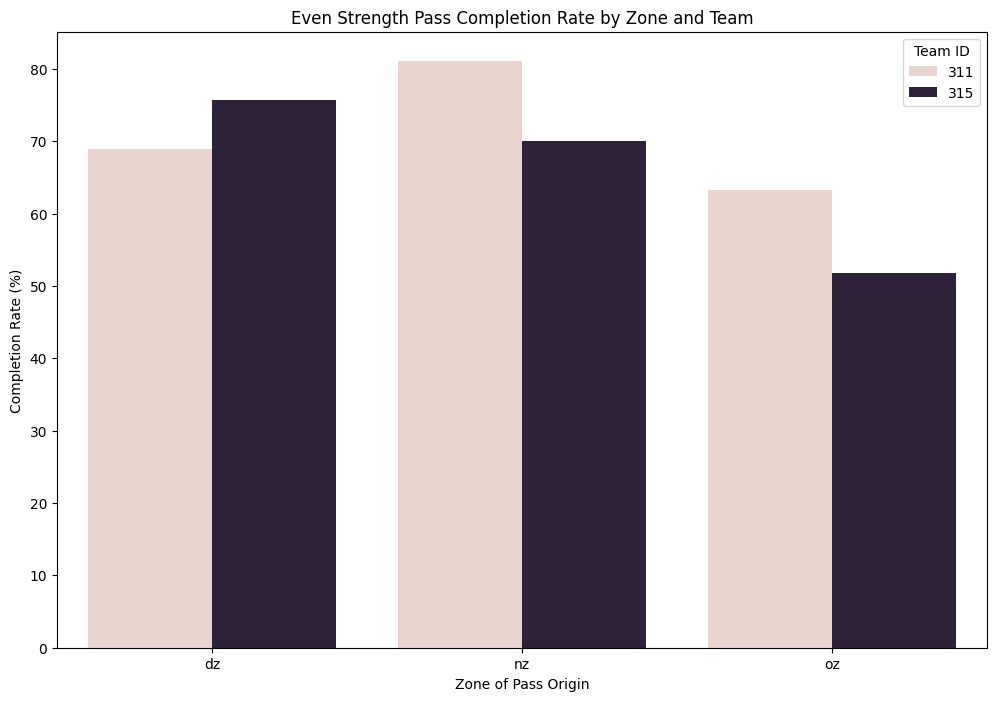

In [58]:
passes_df = df1[(df1['eventname'] == 'pass') & (df1['manpowersituation'] == 'evenStrength')]

# Create a new column to indicate pass success
passes_df['pass_success'] = passes_df['outcome'] == 'successful'

# Group by team and zone, then calculate pass completion rate
pass_completion_rates = passes_df.groupby(['teamid', 'zone']).agg(
    pass_attempts=pd.NamedAgg(column='pass_success', aggfunc='count'),
    successful_passes=pd.NamedAgg(column='pass_success', aggfunc='sum')
).reset_index()

# Calculate the completion rate
pass_completion_rates['completion_rate'] = (pass_completion_rates['successful_passes'] / pass_completion_rates['pass_attempts']) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x='zone', y='completion_rate', hue='teamid', data=pass_completion_rates)
plt.title('Even Strength Pass Completion Rate by Zone and Team')
plt.xlabel('Zone of Pass Origin')
plt.ylabel('Completion Rate (%)')
plt.legend(title='Team ID')
plt.grid(False)

plt.show()


In [72]:
slot_shots = df1[(df1['eventname'] == 'shot') &
                 (df1['playsection'].isin(['innerSlot', 'westOuterSlot', 'eastOuterSlot',
                                             'innerSlotDZ', 'westOuterSlotDZ', 'eastOuterSlotDZ']))]

goalie_stats = slot_shots.groupby('opposingteamgoalieoniceid').apply(lambda x: (x['goal'] == 0).sum() / len(x)*100)

# Convert the series to a DataFrame for better readability
goalie_save_percentage = goalie_stats.reset_index()
goalie_save_percentage.columns = ['opposingteamgoalieoniceid', 'slot_save_percentage']

# Display the results
print(goalie_save_percentage)


   opposingteamgoalieoniceid  slot_save_percentage
0                       5152             96.428571
1                      80264             92.857143


In [74]:
import pandas as pd
import numpy as np

# Filter the DataFrame for shot attempts from the outside north west playsection
shots_from_section = df1[(df1['eventname'] == 'shot') &
                         (df1['playsection'] == 'outsideNorthWest')]

# Calculate the distance of each shot from the center of the goal net
shots_from_section['shot_distance'] = np.sqrt((shots_from_section['xadjcoord'] - 89)**2 + (shots_from_section['yadjcoord'] - 0)**2)

# Group by team and calculate the average shot distance
average_shot_distance = shots_from_section.groupby('teamid')['shot_distance'].mean().reset_index()

# Rename columns for clarity
average_shot_distance.columns = ['teamid', 'average_shot_distance']

# Display the results
print(average_shot_distance)


   teamid  average_shot_distance
0     311              32.740408
1     315              35.573745


<ipython-input-74-db9f97a057c2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_from_section['shot_distance'] = np.sqrt((shots_from_section['xadjcoord'] - 89)**2 + (shots_from_section['yadjcoord'] - 0)**2)


## A3)
### a)
### b)
### c)

## Q4)
### a) Assuming the centre of the net is at X=89 (goal line), Y=0 (centre ice), what was the average shot distance for each team for shots from the outside north west playsection to the centre of the net?
### b) What was each goalie's Goals Saved Above Expected from the outside north west playsection? What does this tell us about their performance from this area?

In [7]:
# Merge the two datasets on playerid and compiledgametime
merged_data = pd.merge(df1, df2, on=['playerid', 'compiledgametime'])

# Filter for shots from the outside north west playsection
shots_from_section = merged_data[(merged_data['eventname'] == 'shot') &
                                 (merged_data['playsection'] == 'outsideNorthWest')]

# Calculate goals saved above expected for each goalie
# Group by goalie id
goalie_performance = shots_from_section.groupby('opposingteamgoalieoniceid').apply(
    lambda x: (x['goal'].sum() - x['xg'].sum()) * -1
).reset_index()

# Rename columns for clarity
goalie_performance.columns = ['goalieid', 'GSAx']

# Display the results
print(goalie_performance)


   goalieid      GSAx
0      5152 -1.455582
1     80264 -0.630304


The xG metric indicates the expected goals that could be conceded. Generally, we expect this value to average around zero, but if xG is positive, it shows that the goalie outperformed expectations, and if it is negative, it shows that the goalie underperformed. In our case, the goalie with ID 5152 had a poor performance, which resulted in an xG of -1.4.

## A4)
### a)

### b)

## Q5)
### a) If a "Shot Assist" is defined as a sequence of events where there is: 1) a successful pass followed by 2) a successful reception by a *teammate* and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. How many shot attempts did playerid 7380 have that were assisted?
### b) For shots that were assisted, if the full xG value from the shot attempt was credited to the passer for their successful pass (shot assist), which passer created the most xG for their teammates?
### c) Plot a single diagram of this passer's shot assists (pass to reception) and their corresponding shots (reception to shot). Hint: Don't forget what you learned about plotting Y coordinates.

In [109]:
# Assuming data exists and is confirmed, filter for player ID 7380
events_by_7380 = df1[df1['playerid'] == 79380]

# Calculate the distribution of event types for player ID 7380
event_distribution = events_by_7380['eventname'].value_counts()
event_distribution_percent = events_by_7380['eventname'].value_counts(normalize=True) * 100

# Display the distribution
print("Distribution of event types for player ID 79380:")
print(event_distribution)
print("\nDistribution of event types in percentages for player ID 79380:")
print(event_distribution_percent)


Distribution of event types for player ID 79380:
eventname
pass         76
reception    65
shot          9
Name: count, dtype: int64

Distribution of event types in percentages for player ID 79380:
eventname
pass         50.666667
reception    43.333333
shot          6.000000
Name: proportion, dtype: float64


In [4]:
df1['event_order'] = range(len(df1))

# Initialize a state tracker
last_successful_pass_index = None
last_successful_reception_index = None

# Initialize a list to collect indices of successful shots following the correct sequence
successful_shot_indices = []

# Iterate through the DataFrame
for index, row in df1.iterrows():
    if row['eventname'] == 'pass' and row['outcome'] == 'successful':
        # Reset the reception index because we have a new pass
        last_successful_pass_index = index
        last_successful_reception_index = None
    elif row['eventname'] == 'reception' and row['outcome'] == 'successful' and last_successful_pass_index is not None:
        # Update the last successful reception index only if there was a successful pass before it
        last_successful_reception_index = index
    elif row['eventname'] == 'shot' and row['playerid'] == 79380 and last_successful_pass_index is not None and last_successful_reception_index is not None:
        # Check if the shot directly follows a reception and the shot is made by player 79380
        if index == last_successful_reception_index + 1:
            successful_shot_indices.append(index)

# Output the count and indices of successful shots following the correct sequence
print("Number of sequential shot attempts by player ID 79380 following a successful pass and reception:", len(successful_shot_indices))
print("Indices of successful shots by player ID 79380:", successful_shot_indices)


Number of sequential shot attempts by player ID 79380 following a successful pass and reception: 7
Indices of successful shots by player ID 79380: [404, 442, 805, 1086, 1323, 1400, 1730]


In [21]:
import pandas as pd

# Merge df1 and df2 on 'playerid' and 'compiledgametime'
merged_data = pd.merge(df1, df2, on=['playerid', 'compiledgametime'])

# Add an index to track the order of events explicitly
merged_data['event_order'] = range(len(merged_data))

# Flag successful passes
merged_data['is_successful_pass'] = (merged_data['eventname'] == 'pass') & (merged_data['outcome'] == 'successful')

# Flag successful receptions by player 79380
merged_data['is_successful_reception_by_79380'] = (merged_data['eventname'] == 'reception') & (merged_data['outcome'] == 'successful') & (merged_data['playerid'] == 79380)

# Flag shot attempts by player 79380
merged_data['is_shot_attempt_by_79380'] = (merged_data['eventname'] == 'shot') & (merged_data['playerid'] == 79380)

# Iterate through merged_data to link passes to receptions and shots
passer_xg_contributions = {}
last_successful_pass_index = -1
last_passer_id = None

for index, row in merged_data.iterrows():
    if row['is_successful_pass']:
        last_successful_pass_index = index
        last_passer_id = row['playerid']
    elif row['is_successful_reception_by_79380'] and index == last_successful_pass_index + 1:
        # This reception follows a pass directly
        continue
    elif row['is_shot_attempt_by_79380'] and index == last_successful_pass_index + 2:
        # This shot follows the reception directly
        if last_passer_id in passer_xg_contributions:
            passer_xg_contributions[last_passer_id] += row['xg']
        else:
            passer_xg_contributions[last_passer_id] = row['xg']

# Find the passer with the maximum xG contributed
max_xg_passer = max(passer_xg_contributions, key=passer_xg_contributions.get)
max_xg_value = passer_xg_contributions[max_xg_passer]

print(f"The passer who created the most xG for their teammates is Player ID {max_xg_passer} with an xG total of {max_xg_value:.2f}")


The passer who created the most xG for their teammates is Player ID 20161 with an xG total of 0.02


<ipython-input-11-e2bd4714fa2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  powerplay_shots['distance_from_goal'] = np.sqrt((powerplay_shots['xadjcoord'] - 100)**2 + powerplay_shots['yadjcoord']**2)


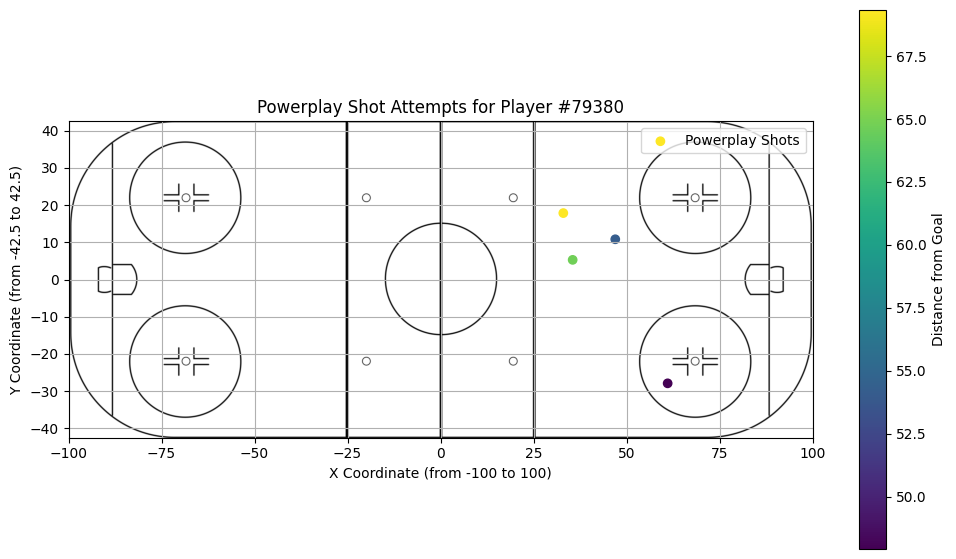

In [11]:
# Filter for powerplay shot attempts by player 79380
powerplay_shots = df1[(df1['manpowersituation'] == 'powerPlay') & (df1['eventname'] == 'shot') & (df1['playerid'] == 79380)]

# Calculate distances from the goal (located at x = 100, y = 0) for each shot
powerplay_shots['distance_from_goal'] = np.sqrt((powerplay_shots['xadjcoord'] - 100)**2 + powerplay_shots['yadjcoord']**2)

# Load an image of a hockey rink if you have one
img = plt.imread('/content/rink_template.png')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(img, extent=[-100, 100, -42.5, 42.5])  # Adjust the extent if necessary to match your data coordinates

# Scatter plot of powerplay shot attempts
scatter = ax.scatter(powerplay_shots['xadjcoord'], powerplay_shots['yadjcoord'], c=powerplay_shots['distance_from_goal'], cmap='viridis', label='Powerplay Shots')

# Plotting details
colorbar = fig.colorbar(scatter, ax=ax, label='Distance from Goal')
ax.set_title('Powerplay Shot Attempts for Player #79380')
ax.set_xlabel('X Coordinate (from -100 to 100)')
ax.set_ylabel('Y Coordinate (from -42.5 to 42.5)')
ax.legend()
ax.grid(True)

plt.show()


## A5)
### a) i think you mean player 79380 cause we dont have 7380
### b)
### c)

## Q6)
### a) Which team won the xG battle and how much xG did each teamid have?
### b) Given who won the game, what does this tell you about how the game went?

In [23]:
team_xg_totals = merged_data.groupby('teamid')['xg'].sum()

# Display the xG totals for each team
print("Total xG for each team:")
print(team_xg_totals)

# Determine which team has the higher xG
if team_xg_totals[311] > team_xg_totals[315]:
    print(f"Team 311 won the xG battle with {team_xg_totals[311]:.2f} xG, compared to Team 315's {team_xg_totals[315]:.2f} xG.")
elif team_xg_totals[315] > team_xg_totals[311]:
    print(f"Team 315 won the xG battle with {team_xg_totals[315]:.2f} xG, compared to Team 311's {team_xg_totals[311]:.2f} xG.")
else:
    print("Both teams tied in the xG battle.")


Total xG for each team:
teamid
311    5.153972
315    4.099661
Name: xg, dtype: float64
Team 311 won the xG battle with 5.15 xG, compared to Team 315's 4.10 xG.


## A6)
### a)
### b)

In a match where Team 311 scored 3 goals and Team 315 scored 4, the xG (expected goals) data tells a more nuanced story. Team 311 had an xG of 5.15, whereas Team 315 had an xG of 4.10. This indicates that although Team 311 was creating better chances, as evidenced by their higher xG, they were less efficient in converting these opportunities into goals compared to Team 315. Essentially, Team 311 was more wasteful with their chances, even though they generated more and better scoring opportunities.

This analysis shows that while Team 311 may have dominated in terms of creating goal-scoring opportunities, their lower conversion rate ultimately cost them the game, as Team 315 was able to score more efficiently.

## Q7)
### a) With the information provided in the data files and the columns you've been asked to create in the questions above, use a statistical technique of your choice to show the highest predictors of a goal within this dataset (what would use if you were building an xG model).
### b) Please explain your reasoning for your choices in answering 7a) and then explain your findings like you were talking to the Assistant Coach.

### Hint: look back at the columns you were asked to create, along with the information already provided in the event dataset, what would lead to dangerous shot attempts? Are there other features from a pass-reception-shot sequence (for example) that would be easy to create with the information provided?

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

df3 = pd.merge(df1, df2, on=['compiledgametime', 'playerid'], how='inner')
df3['distance_from_goal'] = np.sqrt((df3['xadjcoord'] - 100)**2 + df3['yadjcoord']**2)
df3['distance_from_goal'] = np.where(df3['distance_from_goal'] > 100, 200 - df3['distance_from_goal'], df3['distance_from_goal'])




In [76]:
import pandas as pd
import numpy as np

def calculate_shot_angle(x1, y1):
    """
    Calculate the shot angle with respect to the center of the goal at (100, 0).

    Arguments:
    x -- x-coordinate of the shooter
    y -- y-coordinate of the shooter

    Returns:
    angle -- the shot angle in degrees from the horizontal towards the goal
    """
    # Goal is at (100, 0)
    goal_x = 100
    goal_y = 0

    # Calculate differences
    dx = goal_x - x1
    dy = goal_y - y1

    # Calculate angle in radians
    angle_radians = np.arctan2(np.abs(dy), dx)  # np.arctan2 considers the sign for correct quadrant

    # Convert angle to degrees
    angle_degrees = np.degrees(angle_radians)

    return angle_degrees




In [77]:
df3['shot_angle'] = df3.apply(lambda row: calculate_shot_angle(row['xadjcoord'], row['yadjcoord']), axis=1)
# it is not helpfull measure

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the features and target
X = df3[['distance_from_goal','compiledgametime']]
y = df3['xg']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.0057868660077983565, 0.5067595744554301)

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select additional features and encode categorical variables
additional_features = ['type', 'zone', 'manpowersituation']
X_extended = df3[['distance_from_goal'] + additional_features]

# Define the Column Transformer with OneHotEncoder for categorical features
column_transformer = ColumnTransformer(
    [('cat', OneHotEncoder(), additional_features)],
    remainder='passthrough'
)

# Apply the transformations to the feature set
X_extended_transformed = column_transformer.fit_transform(X_extended)

# Split the extended feature set into train and test sets
X_train_ext, X_test_ext, y_train, y_test = train_test_split(X_extended_transformed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor with previously intended tuning
rf_regressor_ext = RandomForestRegressor(n_estimators=170, max_depth=15, random_state=42)
rf_regressor_ext.fit(X_train_ext, y_train)

# Predicting on the test set
y_pred_ext = rf_regressor_ext.predict(X_test_ext)

# Calculating performance metrics
mse_ext = mean_squared_error(y_test, y_pred_ext)
r2_ext = r2_score(y_test, y_pred_ext)

mse_ext, r2_ext


(0.007517172446415792, 0.3592778316682188)

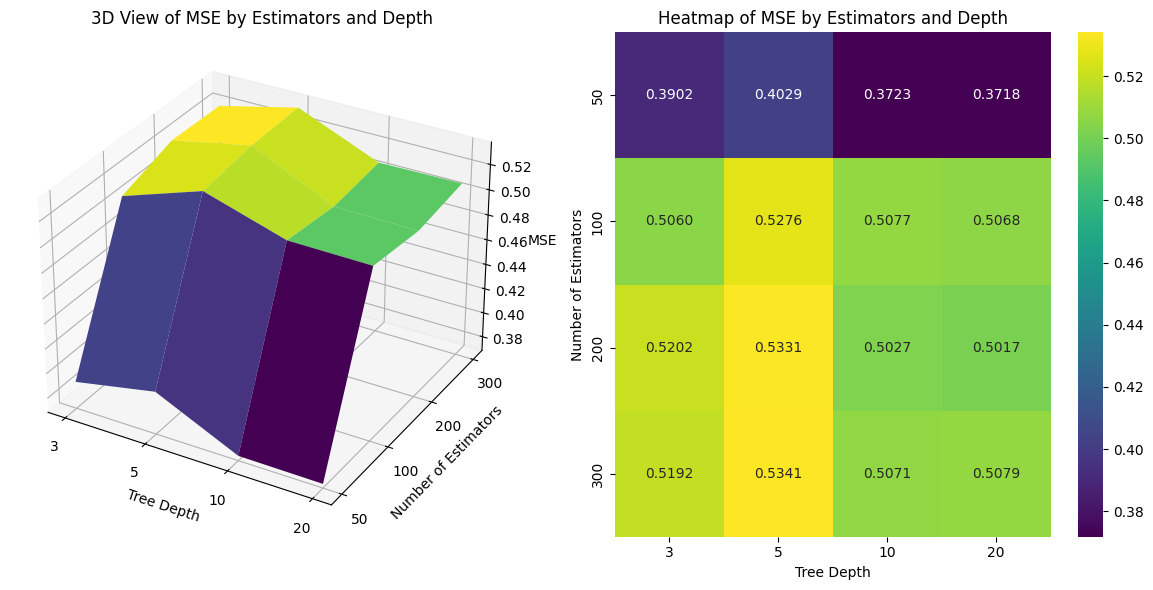

In [80]:
# Parameter ranges
n_estimators_range = [50, 100, 200,300]
max_depth_range = [3, 5, 10, 20]


r2_values = np.zeros((len(n_estimators_range), len(max_depth_range)))

# Train models and compute MSE for each combination
for i, n_estimators in enumerate(n_estimators_range):
    for j, max_depth in enumerate(max_depth_range):
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_values[i, j] = r2_score(y_test, y_pred)

# Plotting 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
x, y = np.meshgrid(range(len(max_depth_range)), range(len(n_estimators_range)))
ax.plot_surface(x, y, r2_values, cmap='viridis')
ax.set_xlabel('Tree Depth')
ax.set_ylabel('Number of Estimators')
ax.set_zlabel('MSE')
ax.set_xticks(range(len(max_depth_range)))
ax.set_xticklabels(['3', '5', '10', '20'])
ax.set_yticks(range(len(n_estimators_range)))
ax.set_yticklabels(n_estimators_range)
ax.set_title('3D View of MSE by Estimators and Depth')

# Plotting heatmap
ax2 = fig.add_subplot(122)
sns.heatmap(r2_values, annot=True, ax=ax2, cmap='viridis', fmt=".4f",
            xticklabels=['3', '5', '10', '20'], yticklabels=n_estimators_range)
ax2.set_xlabel('Tree Depth')
ax2.set_ylabel('Number of Estimators')
ax2.set_title('Heatmap of MSE by Estimators and Depth')

plt.tight_layout()
plt.show()

In [81]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predictions
preds = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: %f" % (mse))
print("R2: %f" % (r2))


MSE: 0.005774
R2: 0.507870


## A7)
### a) for this section I am choosing regression model to find based on existing features fit to y (expected goals). Based on provided information I have chosen Random forest.
### b) Based on the features and data, we can understand that "speed" and "distance from the goal" have the highest impact on goal scoring because these factors directly influence the difficulty for goalkeepers to react and the ease with which a shot can be taken.
Given these insights, we might consider drills that enhance our players' ability to shoot accurately at higher speeds and from varied distances, especially focusing on closing the distance to the goal during offensive maneuvers. Additionally, encouraging a higher shot volume can increase our chances of scoring, as more attempts naturally lead to more scoring opportunities.




# Before you submit:

Please check that you have answered all questions (and sub-questions) to the best of your ability and that every answer can be clearly traced back to work that is shown. If you were unable to produce an answer, please describe and show the work you tried.

Thanks for your time, effort and interest and we hope you enjoyed this exercise!